Smaller Version

/var/folders/z5/kg7g8_hd67dc5v6h5v45lzkw0000gp/T/ipykernel_92379/1029267020.py:54: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, ax=axs[row][col])
/var/folders/z5/kg7g8_hd67dc5v6h5v45lzkw0000gp/T/ipykernel_92379/1029267020.py:54: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, ax=axs[row][col])
/var/folders/z5/kg7g8_hd67dc5v6h5v45lzkw0000gp/T/ipykernel_92379/1029267020.py:54: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, ax=axs[row][col])
/var/folders/z5/kg7g8_hd67dc5v6h5v45lzkw0000gp/T/ipykernel_92379/1029267020.py:54: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, ax=axs[row][col])


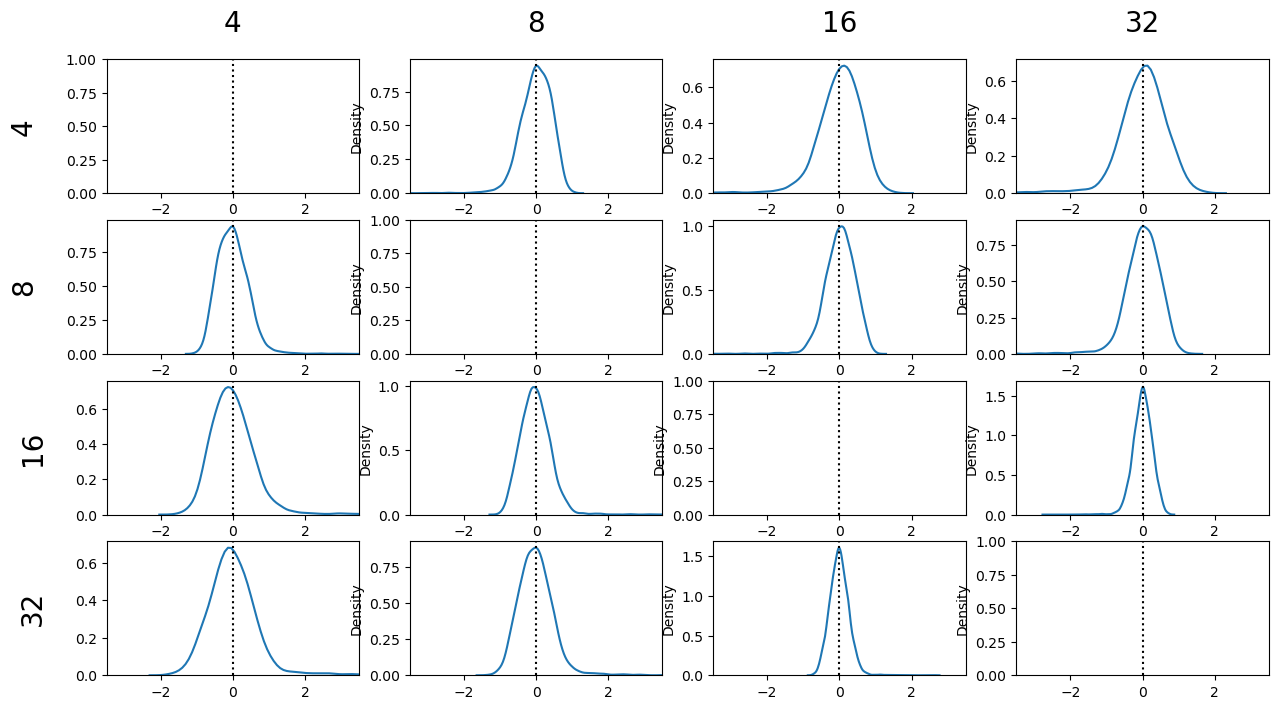

In [46]:
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

ncomps = 4
comps = [4, 8, 16, 32]

names = [
    "4",
    "8",
    "16",
    "32"
]

fig, axs = plt.subplots(
        ncols=4, nrows=4,
        figsize=(15, 8)
    )

def get_kl_div(m1_comp, m2_comp):
    n_samples = 50000
    X, y_true = make_blobs(n_samples=n_samples, n_features=2, centers=500, cluster_std=1.0, random_state=0)
    X = X[:, ::-1]

    gm2 = GaussianMixture(n_components=m1_comp, random_state=0).fit(X)
    gm3 = GaussianMixture(n_components=m2_comp, random_state=0).fit(X)

    m1_samples = gm2.sample(5000)
    m2_samples = gm3.sample(5000)

    m1_m1_ll = gm2.score_samples(m1_samples[0])
    m1_m2_ll = gm2.score_samples(m2_samples[0])
    m2_m2_ll = gm3.score_samples(m2_samples[0])
    m2_m1_ll = gm3.score_samples(m1_samples[0])

    kl_div = -(m1_m1_ll + m1_m2_ll) + (m2_m1_ll + m2_m2_ll)

    return kl_div

for col in range(ncomps):
        ax = axs[0, col]
        ax.set_title(names[col], pad=20, fontsize=20)

for row in range(ncomps):
    ax = axs[row, 0]
    ax.set_ylabel(names[row], labelpad=20, fontsize=20)

for row in range(ncomps):
    for col in range(ncomps):
        data = get_kl_div(comps[row], comps[col])

        sns.kdeplot(data, ax=axs[row][col])
        axs[row][col].set_xlim(-3.5, 3.5)
        axs[row][col].axvline(x=0, color='black', linestyle=':', alpha=1)


Full Version

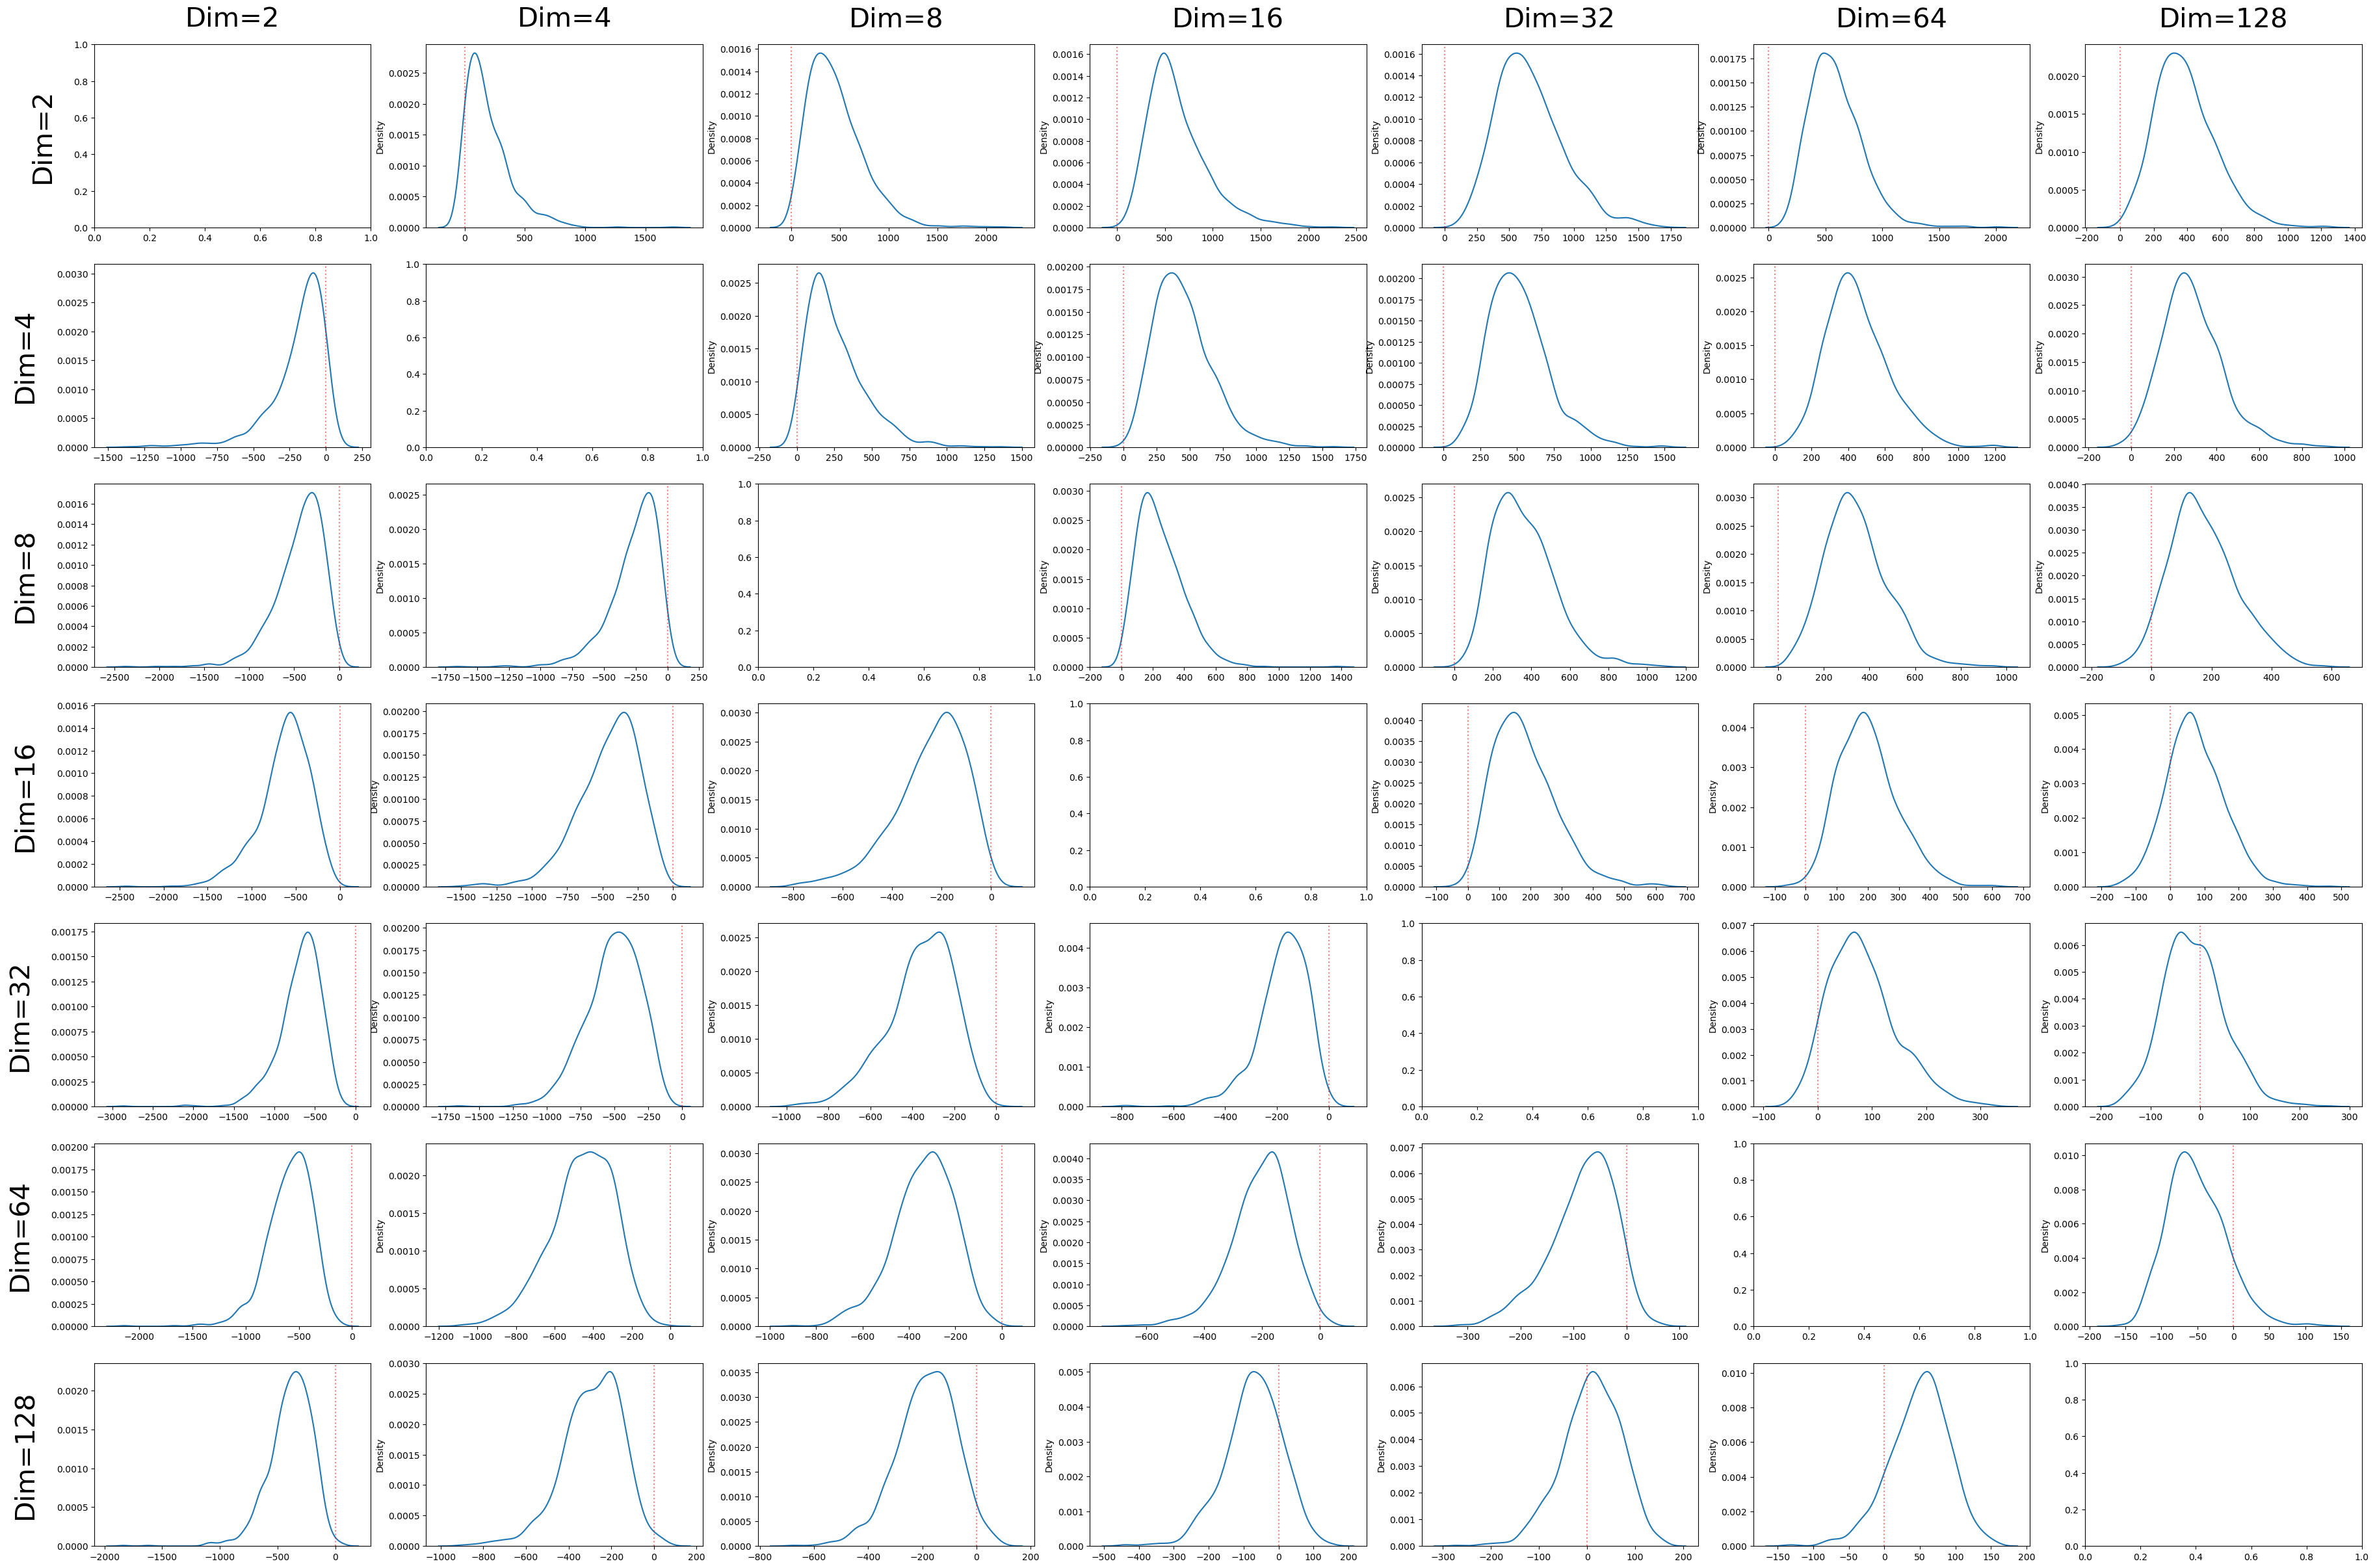

In [12]:
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

ncomps = 7
comps = [2, 4, 8, 16, 32, 64, 128]

names = [
    "Dim=2",
    "Dim=4",
    "Dim=8",
    "Dim=16",
    "Dim=32",
    "Dim=64",
    "Dim=128",
]

fig, axs = plt.subplots(
        ncols=7, nrows=7,
        figsize=(45, 30)
    )
import torch
import os 

def get_kl_div_file(a, b):
    kl_div = torch.load(os.path.join(f"kl_diffs_all/ld{a}_vs_ld{b}/diff.pt"), weights_only=True, map_location=torch.device('cpu'))
    return kl_div

for col in range(ncomps):
        ax = axs[0, col]
        ax.set_title(names[col], pad=20, fontsize=30)

for row in range(ncomps):
    ax = axs[row, 0]
    ax.set_ylabel(names[row], labelpad=20, fontsize=30)

for row in range(ncomps):
    for col in range(ncomps):
        if row != col:
            data = get_kl_div_file(comps[row], comps[col])
            sns.kdeplot(data, ax=axs[row][col])
            axs[row][col].axvline(x=0, color='red', linestyle=':', alpha=0.5)
        

In [ ]:
# fig.savefig('vae_kl_diff.pdf', format='pdf')